# 第2回講義 演習

## 課題. k-Nearest Neighbors (k-NN) を使った手書き文字認識

In [1]:
%matplotlib inline

from __future__ import division
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_mldata

import numpy as np
import matplotlib.pyplot as plt

### 1. MNISTデータセットの読み込み

In [1]:
mnist = fetch_mldata('MNIST original')
mnist_X, mnist_y = shuffle(mnist.data, mnist.target)

mnist_X = mnist_X / 255.0

train_X, test_X, train_y, test_y = train_test_split(mnist_X, mnist_y, test_size=0.2)
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.2)

NameError: name 'fetch_mldata' is not defined

### 2. MNISTデータの可視化

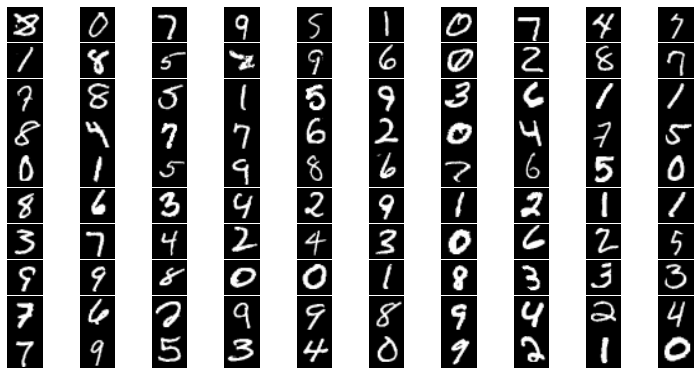

In [4]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in xrange(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(train_X[i].reshape((28, 28)), cmap='gray')

### 3. 精度評価について [[リンク](http://ibisforest.org/index.php?F%E5%80%A4)]

||**実際が正例**|**実際が負例**|
|:---------:|:---------:|:---------:|
|**予測が正例**|True Positive (TP)|False Positive (FP)|
|**予測が負例**|False Negative (FN)|True Negative (TN)|

- 正解率 (Accuracy): 全データのうち, 予測が当たったものの割合
    $$ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{FN} + \text{TN}} $$
- 適合率 (Precision): 正と予測したデータのうち, 実際に正であるものの割合
    $$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $$
- 再現率 (Recall): 実際に正であるもののうち, 正であると予測されたものの割合
    $$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$
- F値 (F-measure): 精度と再現率の調和平均
    $$ \text{F-measure} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

### 4. 距離関数について

#### Cosine類似度

$$ cos \left({\bf a},{\bf b}\right) = \frac{{\bf a}\cdot{\bf b}}{\|{\bf a}\| \|{\bf b}\|} = \frac{\sum^{n}_{i} a_i b_i}{\sqrt{\sum^{n}_{i} a^2_i} \sqrt{\sum^{n}_{i} b^2_i}} $$

In [9]:
# WRITE ME!
import scipy.spatial
def cos_similarity(a, b):
    return 1 - scipy.spatial.distance.cosine(a, b)

In [ ]:
train_size = train_X.shape[0]
valid_size = valid_X.shape[0]
# similarity matrix
similarity_matrix = np.zeros([valid_size, train_size])
for i in xrange(valid_size):
    for j in xrange(train_size):
        similarity_matrix[i,j] = cos_similarity(valid_X[i], train_X[j])

In [2]:
import bottleneck

In [ ]:
bottleneck.